# Understanding the problem statement 
##### Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Goal:
##### To predict if the loan application must be approved or not (Binary classification)

# Hypothesis

##### Salary: Applicants with high income should have more chances of loan approval

##### Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high

##### Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval

##### Loan term: Loan for less time period and less amount should have higher chances of approval

##### EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval


#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np #For Mathematic calulcation
import seaborn as sns #For data visualization
import matplotlib.pyplot as plt #For plotting graph
import os #For changing directory
import sklearn #Scikit-Learn for Model Building

#### Set up directory

In [2]:
path1="C:/Users/Lenovo/Dropbox/0_PLACEMENT/DataScience_Portfolio/Python_Loan_Prediction"
os.chdir(path1) #Directory path1 is set

#### Importing dataset 

In [3]:
train = pd.read_csv("train.csv")

In [4]:
test = pd.read_csv("test.csv")

In [5]:
train_org = train.copy()

In [6]:
test_org = test.copy()

# Understanding data

## Exploring dataset

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
train.shape

(614, 13)

In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
test.shape

(367, 12)

In [12]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

##### Interpretation: Loan_Status is the Target variable

# Frequency

## Target variable

In [13]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

## Plotting Target Variable

<Axes: title={'center': 'Loan_Status'}>

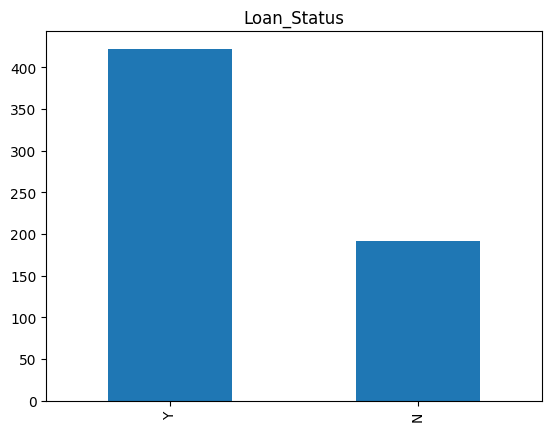

In [15]:
train["Loan_Status"].value_counts().plot.bar(title = "Loan_Status")
# Interpretation: Majority of the loan application is approved

<Axes: title={'center': 'Loan_Status'}>

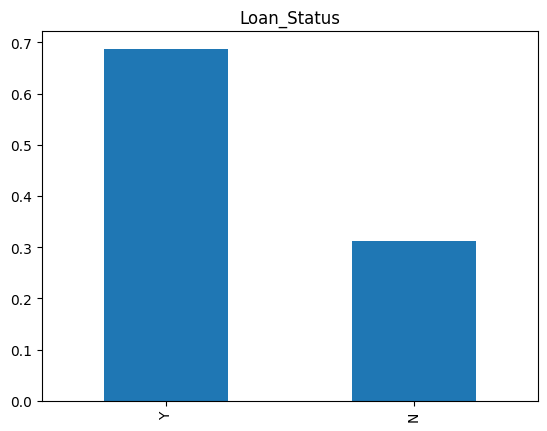

In [16]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = "Loan_Status")
# Interpretation: 69% of the loan application is approved

## Plotting independent Categorical variable

<Axes: title={'center': 'Gender'}>

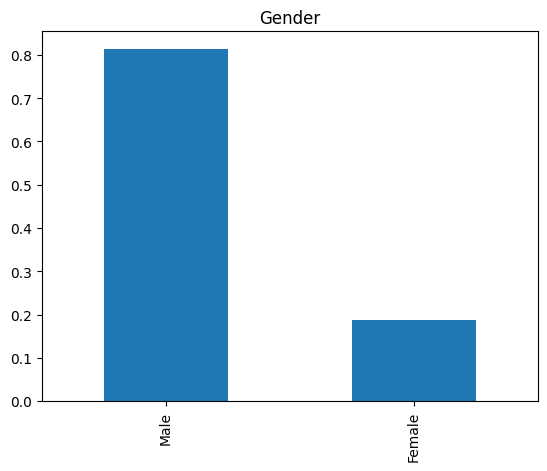

In [17]:
train["Gender"].value_counts(normalize=True).plot.bar(title = "Gender")
# Interpretation: 80% of the loan is applied by Males

<Axes: title={'center': 'Self_Employed'}>

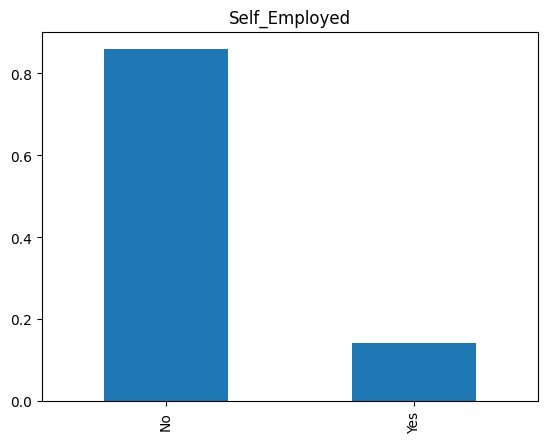

In [18]:
train["Self_Employed"].value_counts(normalize=True).plot.bar(title = "Self_Employed")
# Interpretation: 15% of the applicants are self-employed

<Axes: title={'center': 'Married'}>

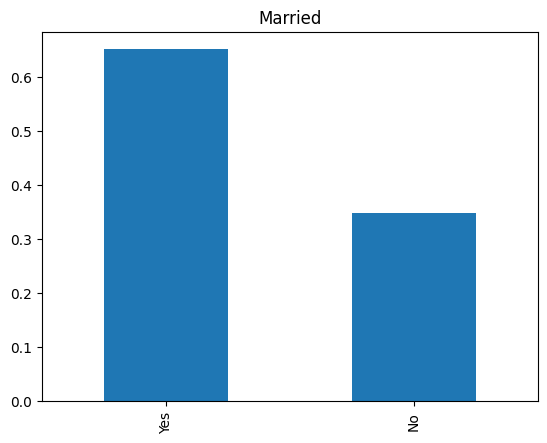

In [19]:
train["Married"].value_counts(normalize=True).plot.bar(title = "Married")
# Interpretation: Majority of the loan is applied by Married person

<Axes: title={'center': 'Credit_History'}>

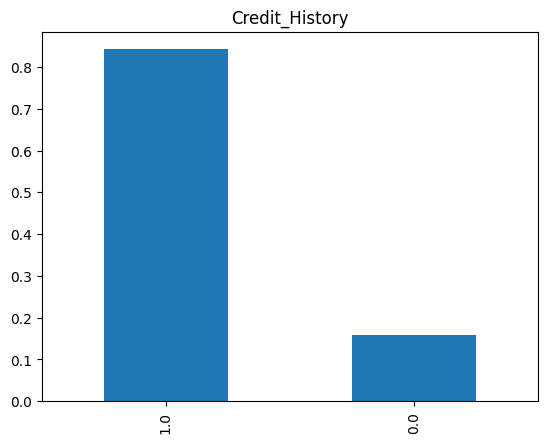

In [20]:
train["Credit_History"].value_counts(normalize=True).plot.bar(title = "Credit_History")
# Interpretation: >80% of applicants has repaid debt

## Plotting independent Ordinal variable

<Axes: title={'center': 'Dependents'}>

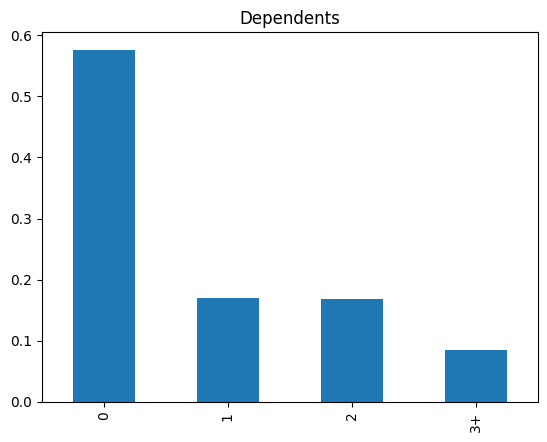

In [21]:
train["Dependents"].value_counts(normalize=True).plot.bar(title = "Dependents")
# Interpretation: More than half of the application has no dependents

<Axes: title={'center': 'Education'}>

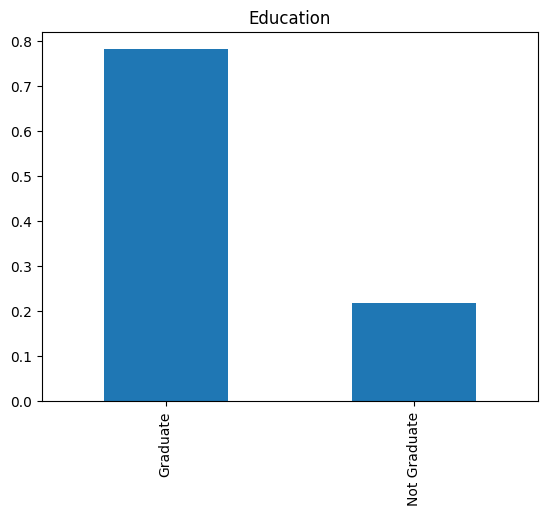

In [22]:
train["Education"].value_counts(normalize=True).plot.bar(title = "Education")
# Interpretation: Majority of the applicants are graduates

<Axes: title={'center': 'Property_Area'}>

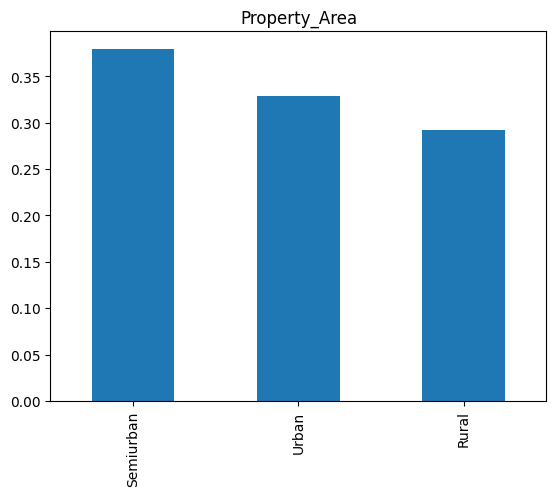

In [23]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title = "Property_Area")
# Interpretation: More than half of the application has no dependents

<Axes: title={'center': 'Loan_Amount_Term'}>

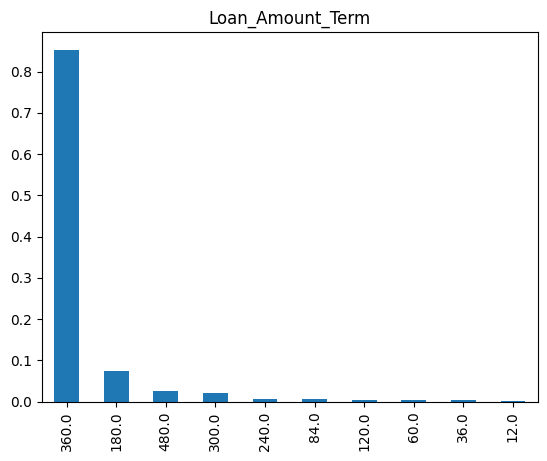

In [24]:
train["Loan_Amount_Term"].value_counts(normalize=True).plot.bar(title = "Loan_Amount_Term")
# Interpretation: >80% of the loans has term of 360

## Plotting independent Numerical variable

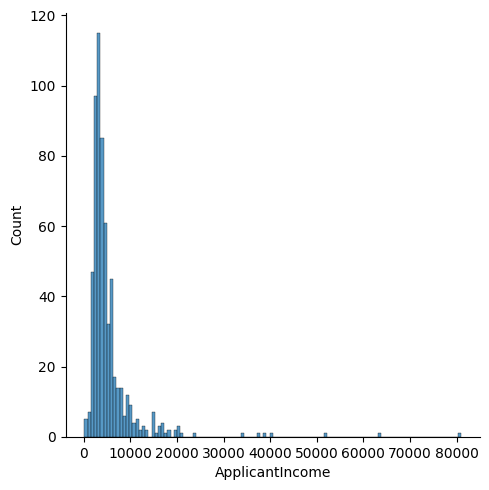

In [25]:
sns.displot(train["ApplicantIncome"])
# Interpretation: Majority of the applicants have income of 5000 
# The data 'Applicant Income' is not normally distributed. It is positively skewed
# The highest value is more then 80K

<Axes: >

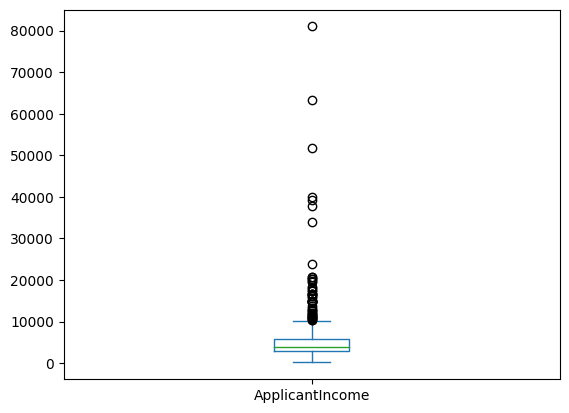

In [26]:
train["ApplicantIncome"].plot.box()
# Interpretation: 'Applicant Income' shows the presence of outlier.
# This must be because of the income gap because of education. Graduate will have more outliers as compared to non-graduates

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

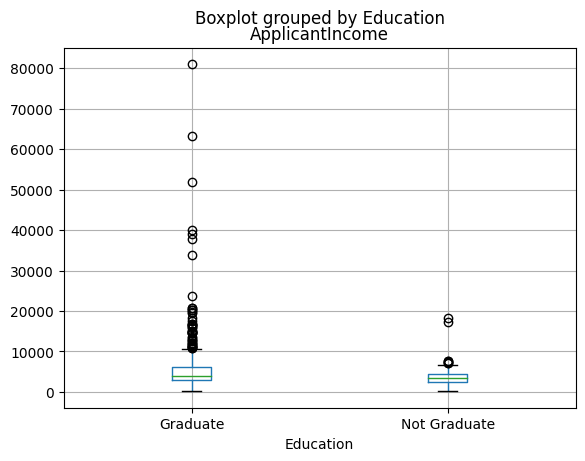

In [27]:
# For more clarification, segregating the Income by Education
train.boxplot(column = "ApplicantIncome", by = "Education")

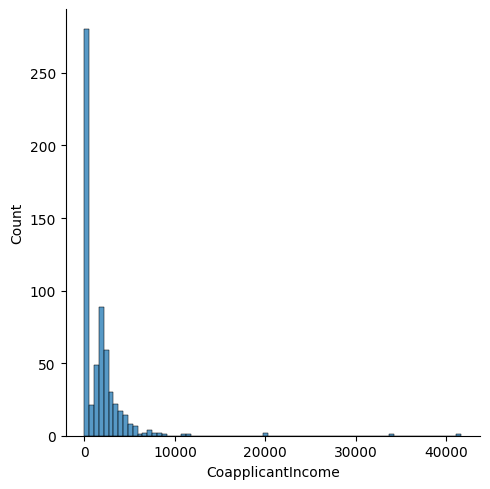

In [28]:
sns.displot(train["CoapplicantIncome"])

<Axes: >

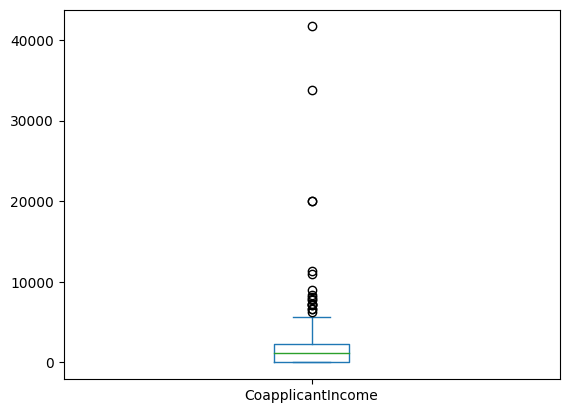

In [29]:
train["CoapplicantIncome"].plot.box()

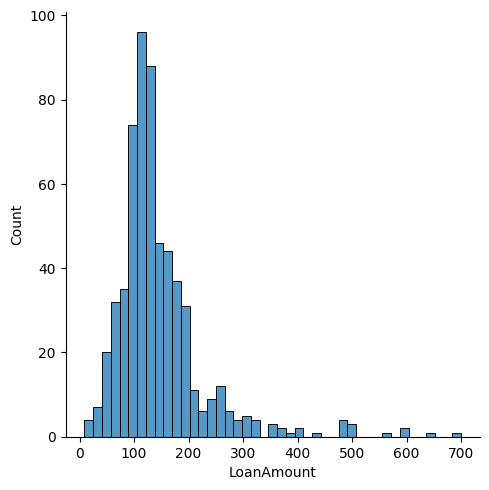

In [30]:
sns.displot(train["LoanAmount"])
#Interpretation: The loan amount is fairly normally distributed

<Axes: >

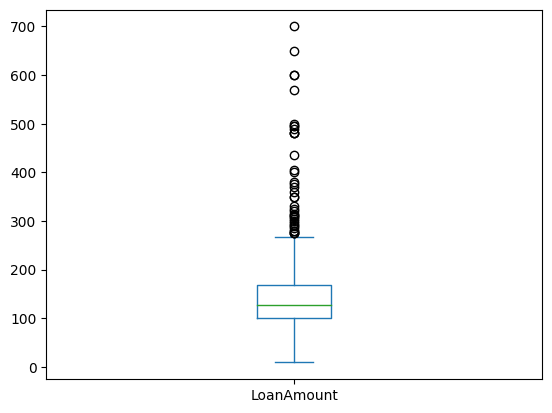

In [31]:
train["LoanAmount"].plot.box()
# The Loan Amount shows a lot of Outliers which needs to be treated.

# Categorical Independent Variable vs Target Variable

<Axes: xlabel='Gender'>

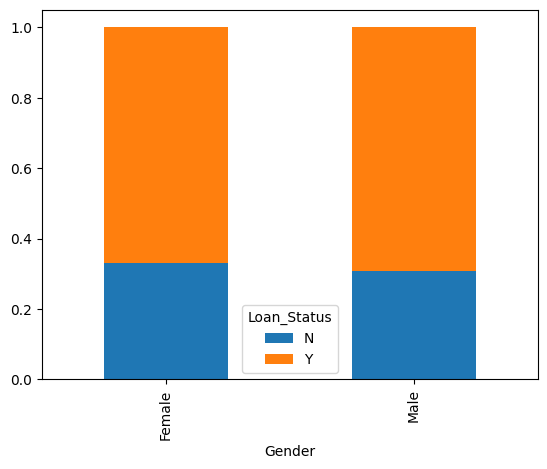

In [32]:
train.groupby("Gender")["Loan_Status"].value_counts(normalize=True).unstack("Loan_Status").plot.bar(stacked=True)

<Axes: xlabel='Married'>

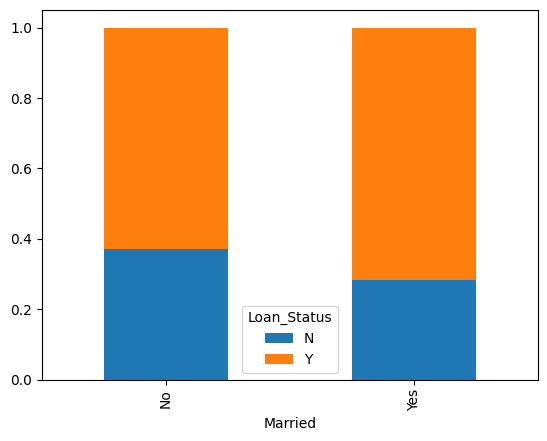

In [33]:
train.groupby("Married")["Loan_Status"].value_counts(normalize=True).unstack("Loan_Status").plot.bar(stacked=True)

<Axes: xlabel='Dependents'>

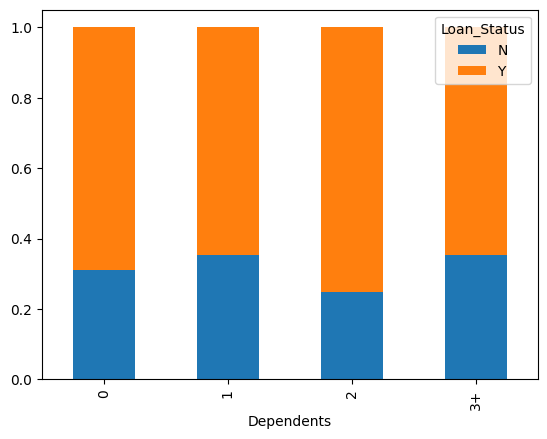

In [34]:
train.groupby("Dependents")["Loan_Status"].value_counts(normalize=True).unstack("Loan_Status").plot.bar(stacked=True)

<Axes: xlabel='Education'>

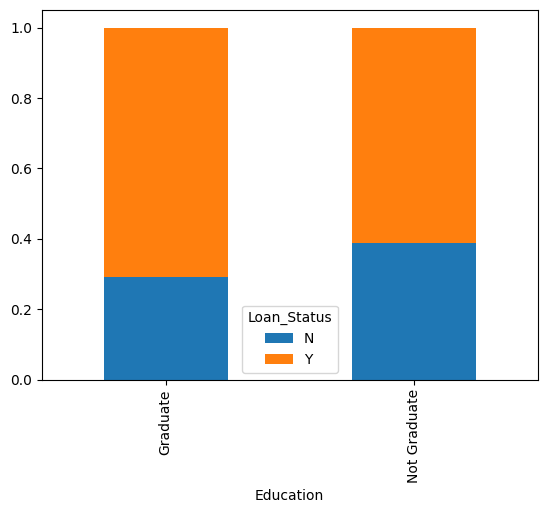

In [35]:
train.groupby("Education")["Loan_Status"].value_counts(normalize=True).unstack("Loan_Status").plot.bar(stacked=True)

<Axes: xlabel='Self_Employed'>

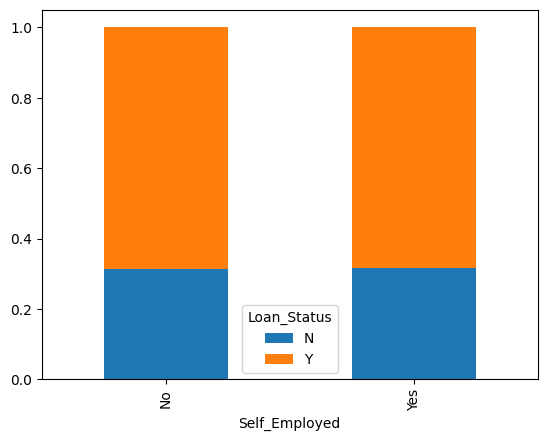

In [36]:
train.groupby("Self_Employed")["Loan_Status"].value_counts(normalize=True).unstack("Loan_Status").plot.bar(stacked=True)

# Testing the Hypothesis
##### Salary: Applicants with high income should have more chances of loan approval

##### Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high

##### Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval

##### Loan term: Loan for less time period and less amount should have higher chances of approval

##### EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval


# Numerical Independent Variable vs Target Variable

### Hypothesis 01: Applicants with high income should have more chances of loan approval

<Axes: xlabel='Loan_Status'>

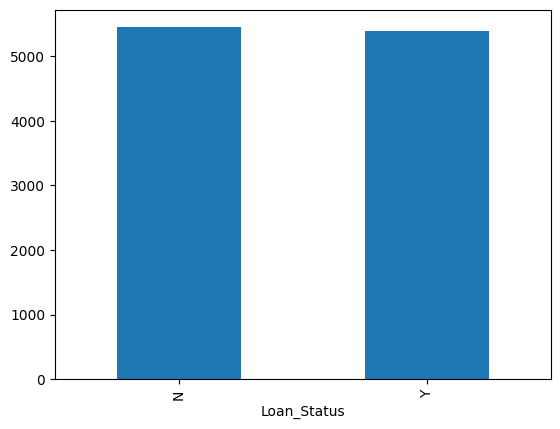

In [37]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

##### Interpretation: The mean income is same for both approved and unapproved loan application
##### Thus, we will be dividing applicant income into buckets/bins comparing it with the approval rate

<Axes: xlabel='Bin'>

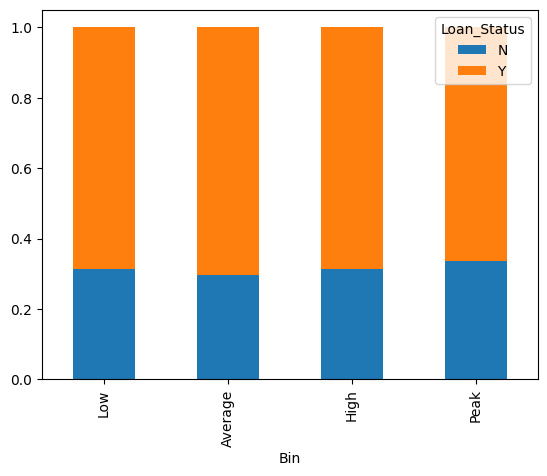

In [38]:
# Creating income buckets/bins for applicants
bins = [0, 2500, 4000, 6000, 81000]
Group = ["Low","Average","High","Peak"]
train["Bin"] = pd.cut(train["ApplicantIncome"], bins, labels=Group)

train.groupby("Bin")["Loan_Status"].value_counts(normalize=True).unstack("Loan_Status").plot.bar(stacked=True)

#### Interpretation: Applicant Income does not affect the Loan approval outcome, Disproving the first hypothesis

<Axes: xlabel='Bin'>

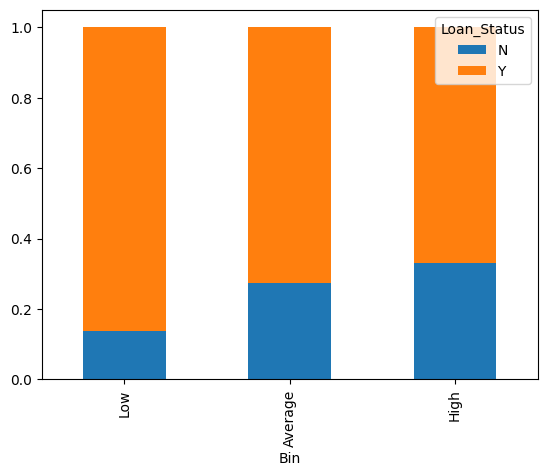

In [39]:
# Creating income buckets/bins for co-applicants
bins = [0, 1000, 3000, 42000]
Group = ["Low","Average","High"]
train["Bin"] = pd.cut(train["CoapplicantIncome"], bins, labels=Group)

train.groupby("Bin")["Loan_Status"].value_counts(normalize=True).unstack("Loan_Status").plot.bar(stacked=True)

##### Interpretation: From the data, it seems that the copplicant Income affects the Loan approval outcome. But this cannot be true. It may be because majority of the coapplicants income data is missing as seen in the distribution plot. 
##### Thus, comparing the total income with approval status

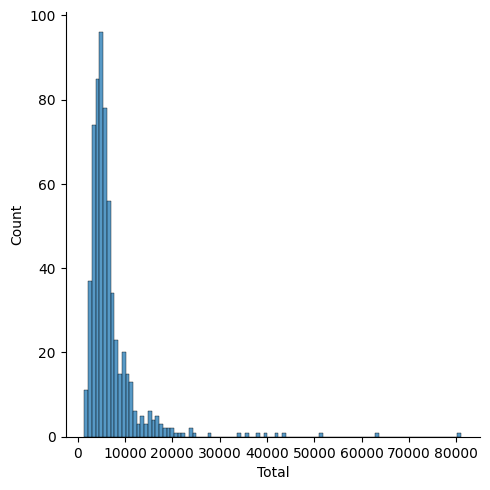

In [40]:
train["Total"] = train["ApplicantIncome"] + train["CoapplicantIncome"]

# Checking the variation
sns.displot(train["Total"])

<Axes: xlabel='Bin'>

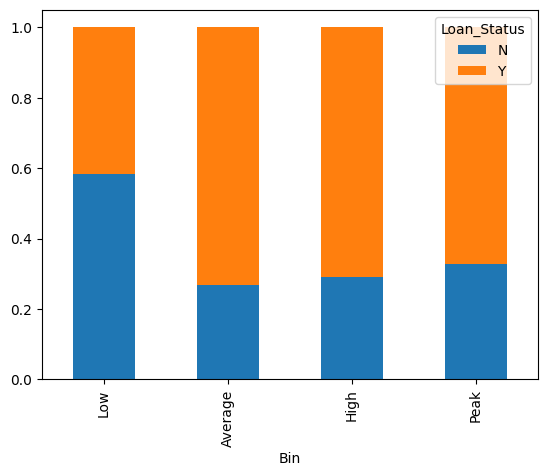

In [41]:
# Creating income buckets/bins for total
bins = [0, 2500, 4000, 6000, 81000]
Group = ["Low","Average","High","Peak"]
train["Bin"] = pd.cut(train["Total"], bins, labels=Group)

train.groupby("Bin")["Loan_Status"].value_counts(normalize=True).unstack("Loan_Status").plot.bar(stacked=True)

##### Interpretation: low income group has low acceptance rate conmparatively as expected

### Hypothesis 02: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high

<Axes: xlabel='Bin'>

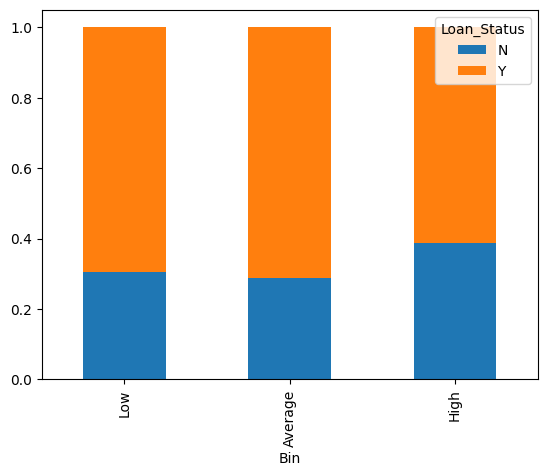

In [42]:
# Creating income buckets/bins for loan amount
bins = [0, 100, 200, 700]
Group = ["Low","Average","High"]
train["Bin"] = pd.cut(train["LoanAmount"], bins, labels=Group)

train.groupby("Bin")["Loan_Status"].value_counts(normalize=True).unstack("Loan_Status").plot.bar(stacked=True)

##### It can be seen that Lower the loan Amount, higher is the chances of loan approval. Thus, Hypothesis 02 is true

<Axes: xlabel='Dependents'>

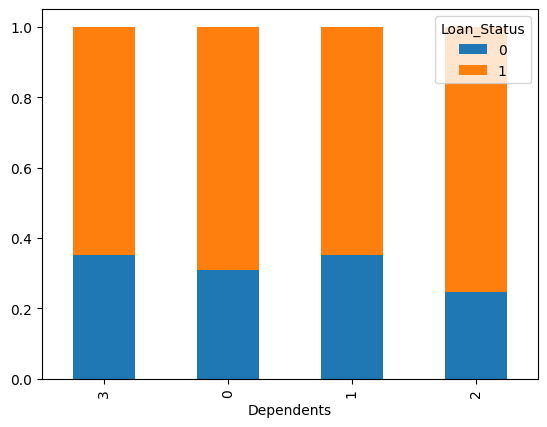

In [43]:
#Converting Target Vaiable - Loan Status to numeric value for comparing correltion with predictor variables in Heat Map
train["Loan_Status"].replace("Y", 1, inplace = True)
train["Loan_Status"].replace("N", 0, inplace = True)

#Also, converting 3+ values of dependent variable to 3
train["Dependents"].replace("3+", 3, inplace = True)
test["Dependents"].replace("3+", 3, inplace = True)

train.groupby("Dependents")["Loan_Status"].value_counts(normalize=True).unstack("Loan_Status").plot.bar(stacked=True)

## Heat Map
##### NOTE: Darker the colour, more is the correlation

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4536\444436557.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = train.corr()


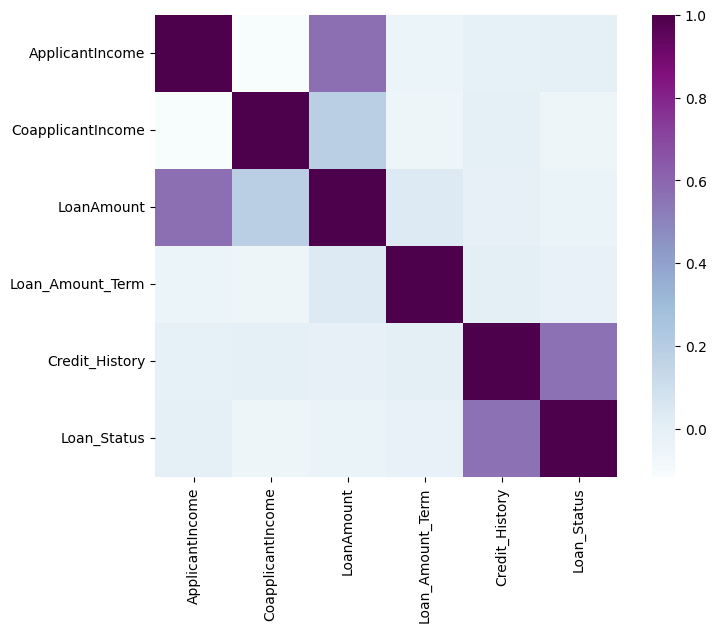

In [44]:
# Drop Total & Bin 
train = train.drop(["Bin", "Total"], axis=1)

matrix = train.corr()
ax = plt.subplots(figsize=(9, 6))
sns.heatmap (matrix, vmax=1, square=True, cmap="BuPu");

#### High correlation is seen between (Loan Status x Credit History) & (Applicant Income x Loan Amount) 

# Treating Missing Values

In [45]:
# Finding missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
#Since the missing values are not much, filling categorical & ordinal with MODE
# NOTE: We use [0] with mode() because mode() returns a series of value and we take the first one with [0]
train["Gender"].fillna(train["Gender"].mode()[0], inplace = True)
train["Married"].fillna(train["Married"].mode()[0], inplace = True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace = True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace = True)
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace = True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace = True)

#Filling numerical with MEDIAN
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace = True)

train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Treating Outliers Values with LOG transformation

##### The loan Amount is Positive or right skewed. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

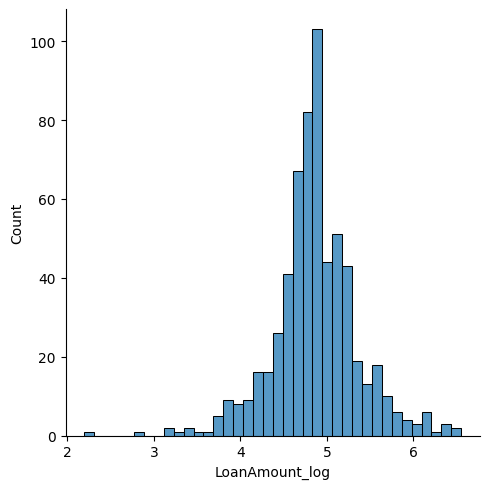

In [47]:
#Log transformation on Train data
train["LoanAmount_log"] = np.log(train["LoanAmount"])
sns.displot(train["LoanAmount_log"])

#Similarly on test data
test["LoanAmount_log"] = np.log(test["LoanAmount"])

# Model building Type 01: Logistic Regression by Scikit Learn

In [48]:
# Dropping the Loan ID varaible as it does not affect target variable
train = train.drop("Loan_ID", axis=1)
test = test.drop("Loan_ID", axis=1)

train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
LoanAmount_log       float64
dtype: object

In [49]:
test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
LoanAmount_log       float64
dtype: object

##### Logistic regression is applied with Scikit Learn (sklearn) library of Python
##### For sklearn, we need target variable in a separate dataset

In [50]:
x = train.drop("Loan_Status", axis = 1)
y = train.Loan_Status

In [51]:
print(x)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes          3      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [52]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


##### Converting all categorical variables to dummy varaibles using get_dummies()

In [53]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [54]:
print(x)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  LoanAmount_log  Gender_Female  Gender_Male  Married_No  \
0               1.0        4.852030         

## Modelling

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import StratifiedKFold

#Split the Training set to Training & Validation set
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3)

In [56]:
model = LogisticRegression(C=1e9, class_weight=None, dual=False,
fit_intercept=True, intercept_scaling=1, max_iter=100,
solver='liblinear', random_state=0)
model.fit(x_train, y_train)
x_val.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
LoanAmount_log             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_3                 uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

## Evaluation Metrics

In [57]:
# Predicting validation data
pred_val = model.predict(x_val)

In [58]:
#print the regression coefficients
print("The intercept b0 =", model.intercept_)
print("The coefficient b1 = \n", model.coef_)

The intercept b0 = [-0.00035439]
The coefficient b1 = 
 [[ 1.76316531e-06 -4.64572583e-05 -3.13551064e-03 -5.68248993e-03
   3.57521369e+00 -2.80093966e-02 -8.19527910e-02  8.15984012e-02
  -3.24703758e-01  3.24349368e-01 -1.87918660e-01  6.37254001e-02
  -6.22430822e-01  7.46269692e-01  1.44357864e-01 -1.44712254e-01
   1.74253603e-01 -1.74607993e-01 -3.96062832e-01  5.75434585e-01
  -1.79726142e-01]]


[[ 24  29]
 [  5 127]]


[Text(0, 0.5, 'N'), Text(0, 1.5, 'Y')]

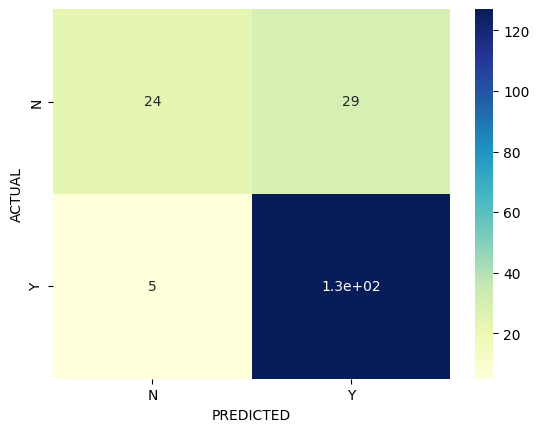

In [59]:
ConfusionMatrix = confusion_matrix(y_val, pred_val)
print(ConfusionMatrix)
a = sns.heatmap(ConfusionMatrix, annot=True, cmap="YlGnBu")
a.set_xlabel("PREDICTED")
a.set_ylabel("ACTUAL");
a.xaxis.set_ticklabels(["N","Y"])
a.yaxis.set_ticklabels(["N","Y"])

In [60]:
TP = ConfusionMatrix[1,1] #True positive
TN = ConfusionMatrix[0,0] #True negative
FN = ConfusionMatrix[1,0] #True positive
FP = ConfusionMatrix[0,1] #True negative
Total=len(y_val)
print("TP =", TP)
print("TN =", TN)
print("FN =", FN)
print("FP =", FP)
print("Total =", Total)

TP = 127
TN = 24
FN = 5
FP = 29
Total = 185


#### Accuracy: how many observations, both positive and negative, were correctly classified
##### Accuracy = (TP + TN)/Total
    
#### Precision: How much were correctly classified as positive out of all positives
##### Precision = TP/TP+FP (Positives)

#### Recall/Sensitivity: Ratio between How much were correctly identified as positive to actual total positive
##### Recall = TP/FN+TP (Actual Positives)

#### Specificity: Ratio between how much were correctly classified as negative to actual total negative
##### Specificity = TN/FP+TN (Actual Negatives)

#### F1 score: Harmonic mean of precision and recall
##### F1 Score = 2 * (precision * recall)/ (precision + recall)
##### F1 score is considered a better indicator of the classifier’s performance than the regular accuracy measure

#### ROC curves is a graphical way to show the connection/trade-off between TP (sensitivity) and FP (specificity)
#### AUC represents the probability of model to classify positive and negative class correctly
##### Eg: AUC = 0.7; The model has 70% chance of correctly classifying the target variable
##### Eg: AUC = 0.5; worst; The model has no discrimination capacity to distinguish between class
##### Eg: AUC = 0; The model is reciprocating the classes - Predicting a negative class as a positive class & vice versa

In [61]:
# Evaluation metric - Accuracy
print("Accuracy from confusion matrix is ", (TN+TP)/Total*100)
print("Accuracy from scikit learn model=",accuracy_score(y_val, pred_val)*100)

Accuracy from confusion matrix is  81.62162162162161
Accuracy from scikit learn model= 81.62162162162161


In [62]:
# Other evaluation metrics - Precision, Recall, F1 Score
print(classification_report(y_val, pred_val, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.83      0.45      0.59        53
         Yes       0.81      0.96      0.88       132

    accuracy                           0.82       185
   macro avg       0.82      0.71      0.73       185
weighted avg       0.82      0.82      0.80       185



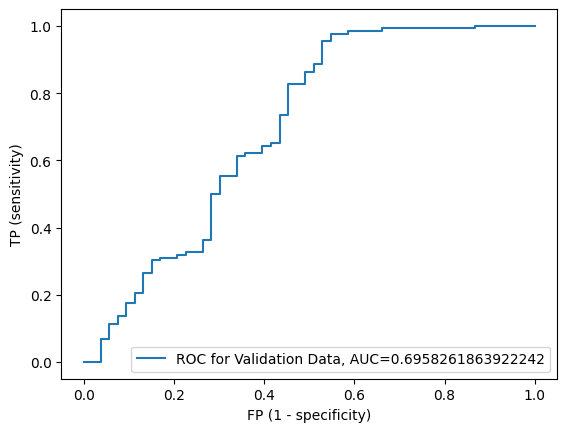

In [63]:
# ROC (AUC)
# Receiver Operating Characteristic curve - Area under Curve
y_pred_proba = model.predict_proba(x_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)

auc = roc_auc_score(y_val, y_pred_proba)
a = plt.plot(fpr,tpr,label="ROC for Validation Data, AUC="+str(auc))
plt.xlabel("FP (1 - specificity)")
plt.ylabel("TP (sensitivity)")
plt.legend(loc=4)
plt.show()

## Predicting Test data

In [64]:
test.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
LoanAmount_log              5
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_3                0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [65]:
#Since the missing values are not much, filling categorical & ordinal with MODE
test["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace = True)
test["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace = True)

#Filling numerical with MEDIAN
test["LoanAmount"].fillna(train["LoanAmount"].median(), inplace = True)
test["LoanAmount_log"].fillna(train["LoanAmount_log"].median(), inplace = True)

test.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [66]:
# Predicting test data
pred_test = model.predict(test)

In [67]:
# Checking the format of submission table
submission = pd.read_csv("sample_submission.csv")
print(submission)

      Loan_ID Loan_Status
0    LP001015           N
1    LP001022           N
2    LP001031           N
3    LP001035           N
4    LP001051           N
..        ...         ...
362  LP002971           N
363  LP002975           N
364  LP002980           N
365  LP002986           N
366  LP002989           N

[367 rows x 2 columns]


In [68]:
# Saving Loan Status for test data in submission table
submission["Loan_Status"] = pred_test
submission["Loan_ID"] = test_org["Loan_ID"]
print(submission)

      Loan_ID  Loan_Status
0    LP001015            1
1    LP001022            1
2    LP001031            1
3    LP001035            1
4    LP001051            1
..        ...          ...
362  LP002971            1
363  LP002975            1
364  LP002980            1
365  LP002986            1
366  LP002989            1

[367 rows x 2 columns]


In [69]:
#Converting Target Vaiable - Loan Status back to Y, N
submission["Loan_Status"].replace(1, "Y", inplace = True)
submission["Loan_Status"].replace(0, "N", inplace = True)
print(submission)

      Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           Y
..        ...         ...
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           Y
366  LP002989           Y

[367 rows x 2 columns]
